Es importante reconocer las transacciones de tarjetas de crédito fraudulentas.

#contenido
Este dataset contiene solo variables de entrada numéricas. No tenemos mucha informacion proporcionada por problemas de confidencialidad. Las características V1, V2, … V28 son los principales componentes. las únicas características que no tenemos transformadas son 'Time'(tiempo transcurrido entre transacciones) y 'Amount'(la cantidad de transacciones).



In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")
import matplotlib as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder
from hdbscan import HDBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/modulo 3 /creditcard.csv')# cargamos archivo
df.head()# # vamos a hacer un poco de exploración de los datos que tenemos, empezando por ver las primeras filas de datos
# que tenemos para hacernos una idea de los datos con los que contamos
  


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info() # vamos a ver qué información nos puede proporcionar Pandas sobre los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172 % de todas las transaccione

In [ ]:
df.Class.sum()

492

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isna().sum() # comprobamos valores nulos. No tenemos valores nulos

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.duplicated().sum()

1081

In [ ]:
# Empecemos por ver más información que nos puede dar la libreria de Pandas sobre nuestros datos

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.columns # aqui tenemos nombres de nuestras columnas

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

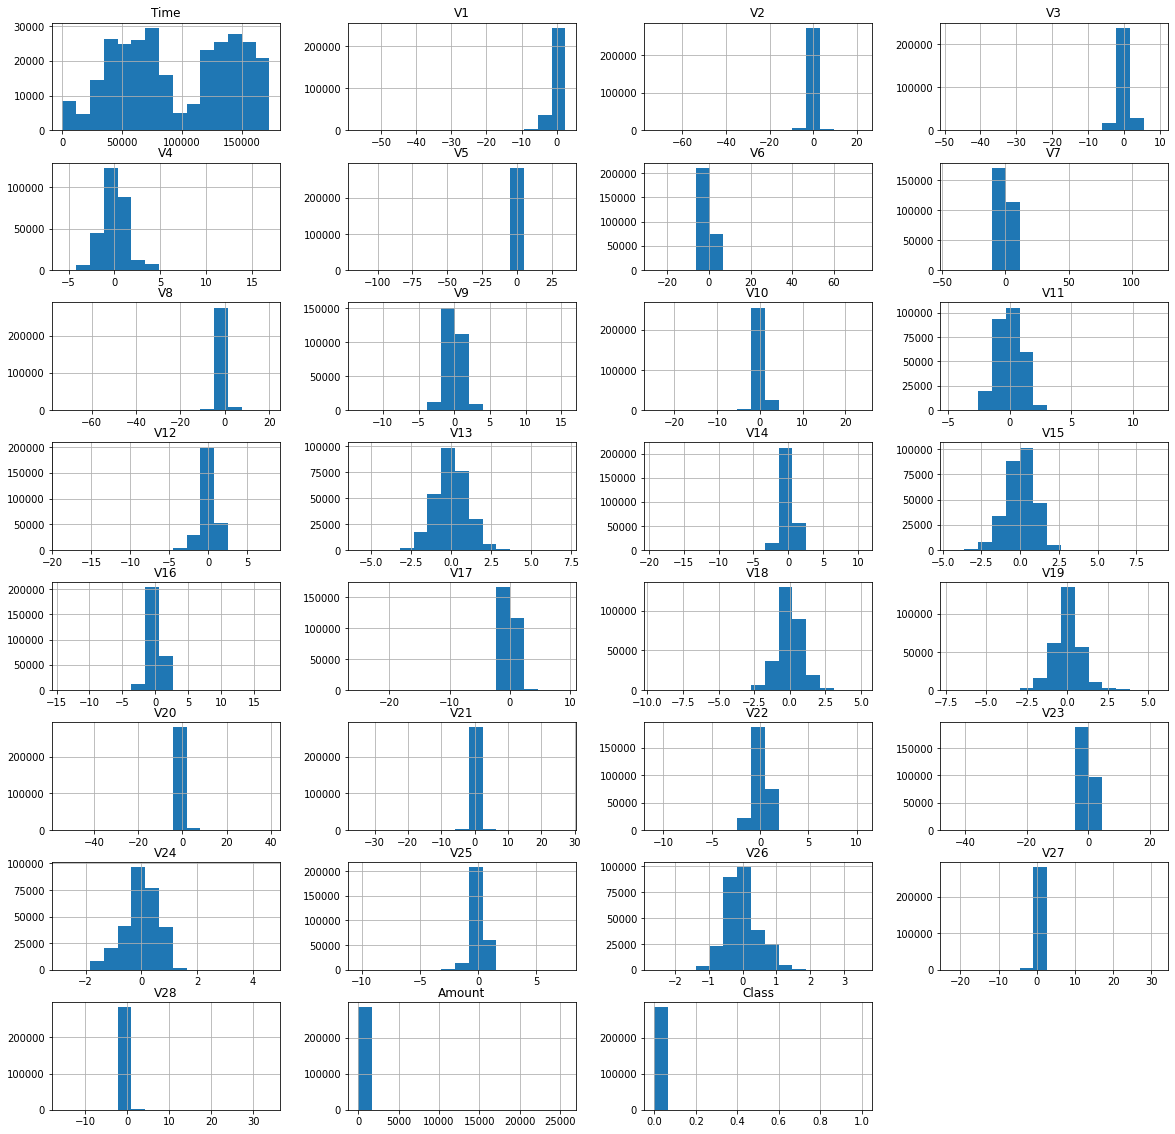

In [ ]:
# vamos a ver una representación visual de las distintas variables. 

df.hist(bins=15, figsize=(20, 20), layout=(8, 4));

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

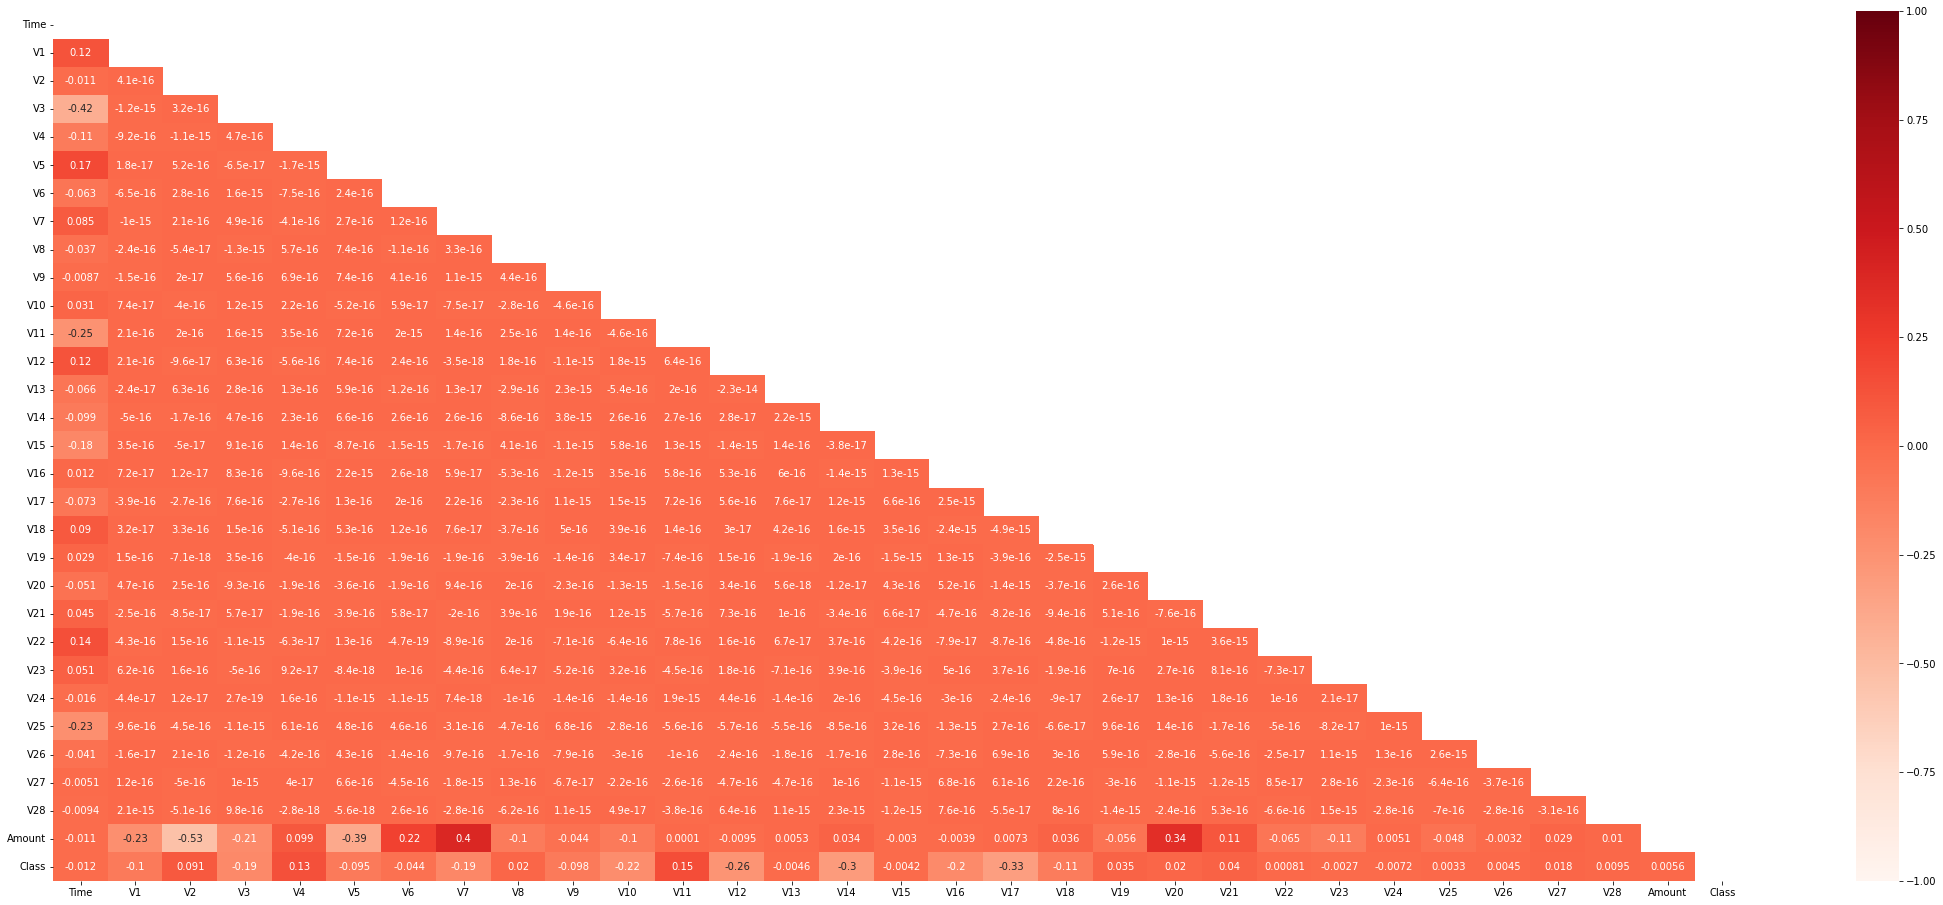

In [ ]:
# A la hora de poder entender qué variables son las que están marcando la creación 
# de los distintos grupos (clusters) es interesante saber la correlación entre las distintas
# variables 
plt.subplots(figsize=(38,16))

mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Reds')


aunque no sabemos qué significan las características "V", será útil comprender cómo cada una de estas características influye en el resultado (fraude o no fraude) al tener un marco de datos desequilibrado.
no podemos  ver las verdaderas correlaciones entre la clase y las características

Creamos un modelo de prediccion logistica

In [ ]:
X = df.drop('Class', axis = 1) # Nuestro target variable va a ser Class
Y = df['Class']

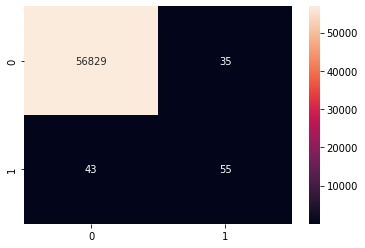

In [ ]:
# Vamos a generar unos sets de entrenamiento y de pruebas que podamos utilizar en los pasos
# de entrenamiento y pruebas de modelo
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
#Guardaremos el modelo en un objeto 
lr = LogisticRegression()
# ahora empezamos el entrenamiento del modelo. 
lr.fit(x_train,y_train)
# generamos predicciones
pred = lr.predict(x_test)
confu = confusion_matrix(y_test, pred)
sns.heatmap(confu, annot = True, fmt = 'd')

In [ ]:
# nuestro modelo funcciona bastante bien
accuracy_score(y_test, pred)

0.9986306660580738

In [ ]:
# Vamos a seleccionar las columnas que vamos a utilizar para nuestro modelo. 

X = df.loc[:, ('Time','Class','Amount')]

X.head()

,Time,Class,Amount
0,0.0,0,149.62
1,0.0,0,2.69
2,1.0,0,378.66
3,1.0,0,123.50
4,2.0,0,69.99


Dado que se trata de un problema de aprendizaje no supervisado donde los modelos se basan en 
distancias para medir la pertenencia de los distintos puntos de datos a un grupo u otro, es muy 
importante la utilización de un escalado 

In [ ]:
# aplicamos el scaler para que aprenda de nuestros datos y los transforme a una escala standard
standard_scaler = StandardScaler()
scaled_X = standard_scaler.fit_transform(X)
scaled_X_df = pd.DataFrame(scaled_X,index=X.index, columns = X.columns)
scaled_X_df.head()

,Time,Class,Amount
0,-1.996583,-0.041599,0.244964
1,-1.996583,-0.041599,-0.342475
2,-1.996562,-0.041599,1.160686
3,-1.996562,-0.041599,0.140534
4,-1.996541,-0.041599,-0.073403


In [ ]:
# Vamos a empezar con la creación de nuestro modelo
kmean = KMeans(n_clusters= 2, random_state = 123 )

In [ ]:
# Entrenamos nuestro modelo
kmean.fit(scaled_X_df)

KMeans(n_clusters=2, random_state=123)

In [ ]:
# vamos a generar las etiquetas de nuestros grupos 
kmean.predict(scaled_X_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
etiquetas = kmean.labels_

In [ ]:
# definimos una nueva lista que va a tener el error de asignación de los clusters para cada valor de K

wcss = []

# Probamos diferentes valores de K 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=123)
  kmeans.fit(scaled_X_df)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss[0]

854421.0000000077

In [ ]:

import matplotlib.pyplot as plt 
import seaborn as sns


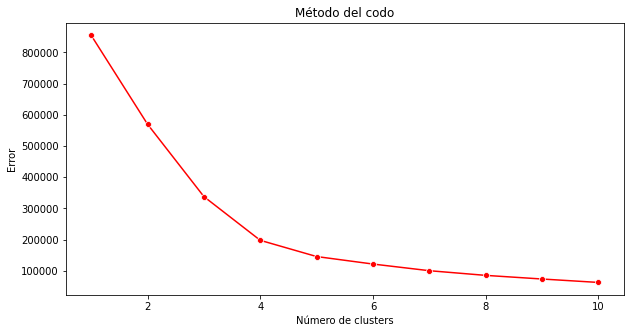

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Error')
plt.show()

El error que se produce con la asignación de los distintos clusters va descendiendo según aumentamos el valor de K. Aqui valor óptimo sería 4, puesto que vemos que es donde se produce el codo de la gráfica y donde vemos el cambio de tendencia. Aumentar el número de clusters por encima de 4 no produce una reducción significativa del error de asignación de los clusters, mientras que reducir el número de clusters por debajo de 4 produce un aumento significativo del error de asignación de los clusters

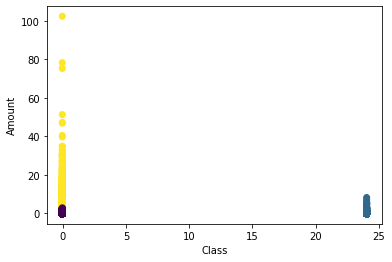

In [ ]:
new_kmeans = KMeans(n_clusters=4)
new_kmeans.fit(scaled_X_df)
labels = new_kmeans.predict(scaled_X_df)

plt.scatter(scaled_X_df['Class'], scaled_X_df['Amount'], c=labels)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

Hemos mostrado los grupos que hemos creado en función de dos de las variables que hemos utilizado para el entrenamiento del modelo. 

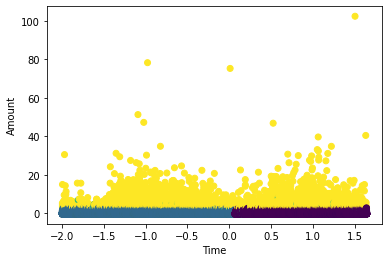

In [ ]:
new_kmeans = KMeans(n_clusters=4)
new_kmeans.fit(scaled_X_df)
labels = new_kmeans.predict(scaled_X_df)

plt.scatter(scaled_X_df['Time'], scaled_X_df['Amount'], c=labels)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

Tambien podemos entrenar nuestro modelo agrupando en clusters 

In [ ]:
# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from hdbscan import HDBSCAN


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/modulo 3 /creditcard.csv') # cargamos archivo

In [ ]:
scaler = StandardScaler() # usamos standartScaler

In [ ]:
col_names = df.columns
df[col_names] = scaler.fit_transform(df[col_names].values) # transformamos columnas

In [ ]:
kmean = KMeans(n_clusters= 2, random_state = 123 )
kmean.fit(df) # entrenamos modelo
kmean.predict(df)
etiquetas = kmean.labels_
clusters = pd.concat([df, pd.DataFrame({'cluster':etiquetas})], axis=1) # concatenamos
clusters.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599,1
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599,1
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599,1
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599,1
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599,1


In [ ]:
clusters.groupby('cluster').agg(['mean', 'median']).T # agrupamos en 2 clusters

cluster               0         1
Time   mean    0.918053 -0.768228
       median  0.967804 -0.792017
V1     mean    0.220869 -0.184824
       median  0.231736 -0.195611
V2     mean   -0.009248  0.007739
...                 ...       ...
V28    median -0.089853  0.071048
Amount mean   -0.027135  0.022707
       median -0.273308 -0.254996
Class  mean   -0.007265  0.006079
       median -0.041599 -0.041599

[62 rows x 2 columns]

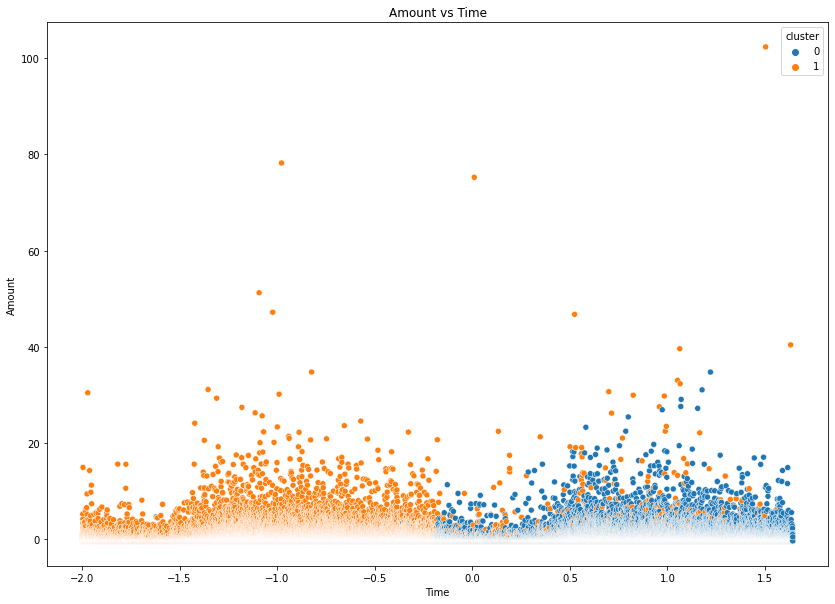

In [ ]:
plt.figure(figsize=(14,10)) # Dibujamos plot y vemos distribucion de la cantidad en el tiempo
x = df['Time']
y = df['Amount']
g = sns.scatterplot(x, y, hue = clusters['cluster'])
g.set_xlabel('Time')
g.set_ylabel('Amount')
g.set_title('Amount vs Time')
plt.show()

Nuestros datos son muy desequilibrados y tampoco tenemos mucha informacion proporcionada, nuestro modelo no puede detectar correctamente transacciones que no son de fraude en una gran cantidad de casos y, en cambio, puede ser que clasifica erróneamente esas transacciones como casos de fraude.